In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
import random
import sys
import importlib
'''
This make figs script uses the objects instead of pickling and calculating like v1
'''

'\nThis make figs script uses the objects instead of pickling and calculating like v1\n'

In [21]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import plot_functions 
import Subject_Object
importlib.reload(Subject_Object)
importlib.reload(plot_functions)
import plot_functions as pf

## Initial Thangs

In [22]:
experiment = 'Exp2'

In [23]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir(f'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{experiment}')
PATH = os.getcwd()
SAVE_PATH = f'C:\\Users\\Seth Sullivan\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Group_Figures\\{experiment}\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

if experiment == 'Exp1':
    tp3_title = "1000 (50)"
    tp4_title = "1000 (150)"
    tp5_title = '1100 (50)'
    tp6_title = "1100 (150)"
    tp7_title = "1200 (50)"
    tp8_title = '1200 (150)'
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
    num_blocks = len(trial_block_titles)
    num_rows,num_cols = 2,3
    
if experiment == 'Exp2':
    tp3_title = "Win = 1\nIncorrect = 0\nIndecision = 0"
    tp4_title = "Win = 1\nIncorrect = -1\nIndecision = 0"
    tp5_title = "Win = 1\nIncorrect = 0\nIndecision = -1"
    tp6_title = "Win = 1\nIncorrect = -1\nIndecision = -1"
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title]
    num_blocks = len(trial_block_titles)
    num_rows,num_cols = 2,2
    
num_subjects

7

## Pickle Objects

In [24]:
NUM_STDS = 0
append_dict = {0:'reaction_time_no_sd_off',1:'reaction_time_minus_sd',2:'reaction_time_minus_2sd'}
load_path = r'Subjects_Analyzed'
group = dill.load((open(load_path + f'\\group_object_{append_dict[NUM_STDS]}.pkl', 'rb')))
group.analyze_data()

D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object.py:409: RuntimeWarning: Mean of empty slice
  self.binned_player_task_leave_times_mean            = np.nanmean(self.binned_player_task_leave_times,axis=2) # Mean for each bin, each condition
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object.py:410: RuntimeWarning: Mean of empty slice
  self.binned_player_minus_agent_task_leave_time_mean = np.nanmean(self.binned_player_minus_agent_task_leave_time,axis=2)


## Set Save to True or False

In [25]:
save = False

Reaction Time Distributions (Group)

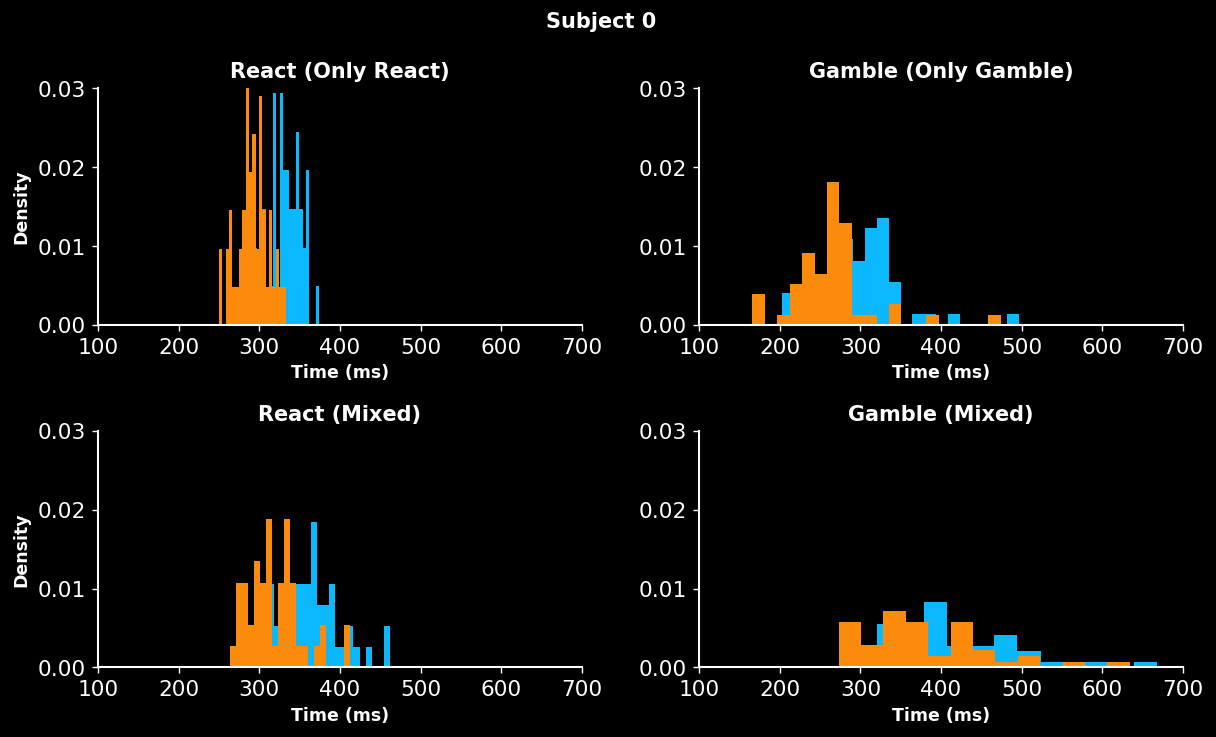

In [26]:
titles = ['React (Only React)', 'Gamble (Only Gamble)','React (Mixed)','Gamble (Mixed)']
for i in range(1):
    fig,axs = plt.subplots(2,2,figsize = (10,6))
    reaction_time_list = [group.react_reaction_time_only_react[i,:],group.gamble_reaction_time_only_gamble[i,:],
                          group.react_reaction_time_mixed[i,:],group.gamble_reaction_time_mixed[i,:]]
    yforce_reaction_time_list = [group.yforce_react_reaction_time_only_react[i,:],group.yforce_gamble_reaction_time_only_gamble[i,:],
                          group.yforce_react_reaction_time_mixed[i,:],group.yforce_gamble_reaction_time_mixed[i,:]]
    for j,ax in enumerate(axs.flatten()):
        ax.hist(reaction_time_list[j] ,bins=20,density=True)
        ax.hist(yforce_reaction_time_list[j] ,bins=20,density=True)
        ax.set_title(titles[j],fontsize = 12)
        ax.set_xlabel('Time (ms)',fontsize = 10)
        ax.set_xlim(100,700)
        ax.set_ylim(0,0.03)
        
    axs[0,0].set_ylabel('Density',fontsize = 10)
    axs[1,0].set_ylabel('Density',fontsize = 10)
    plt.suptitle(f'Subject {i}',fontsize = 12)
    plt.tight_layout()
    plt.show()

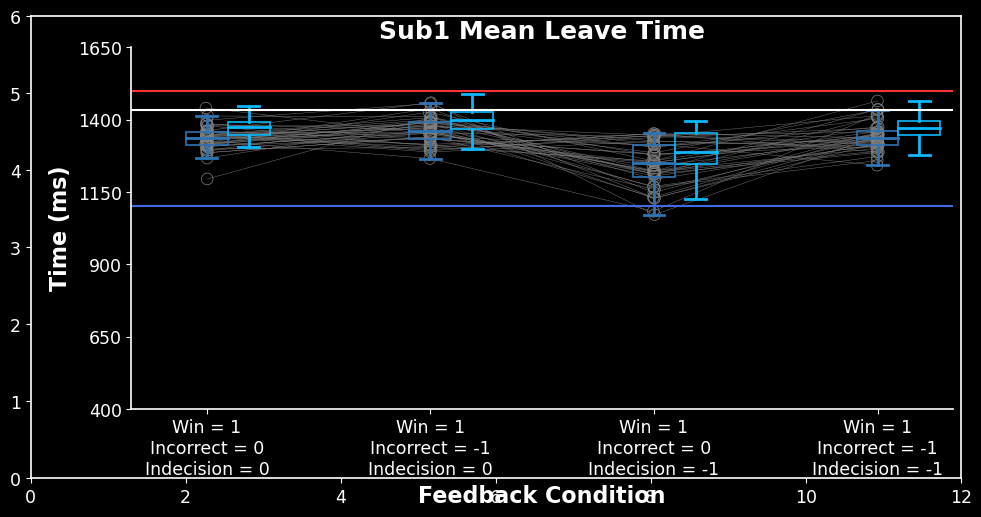

In [27]:
for i in range(1):
    metric = group.player_yforce_task_leave_time[i,:].T
    metric2 = group.player_task_leave_time[i,:].T
    w,h = 12,6
    axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
    xlocs = np.linspace(0,w,num=len(trial_block_titles))
    ylocs = np.arange(400,1800,250)
    bw = 0.75
    pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
    pf.multi_boxplot(ax,metric2,xlocs=xlocs+bw,box_width = bw,colors = wheel.rak_blue)
    dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
    ax.axhline(y=1500,c=wheel.red)
    ax.axhline(y=1100,c=wheel.blue)
    ax.axhline(y=1100+np.nanmedian(group.react_reaction_time_only_react[i]))
    ax.set_xticks(xlocs),ax.set_yticks(ylocs)
    ax.set_xticklabels(trial_block_titles)
    ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

    ax.set_xlabel('Feedback Condition')
    ax.set_ylabel('Time (ms)')
    ax.set_title(f'Sub{i+1} Mean Leave Time')
    if save:
        axmain.set_axis_off()
        plt.savefig(SAVE_PATH+'mean_leave_time', dpi = 400, transparent = True)
    else:
        axmain.set_axis_on()
    plt.show()

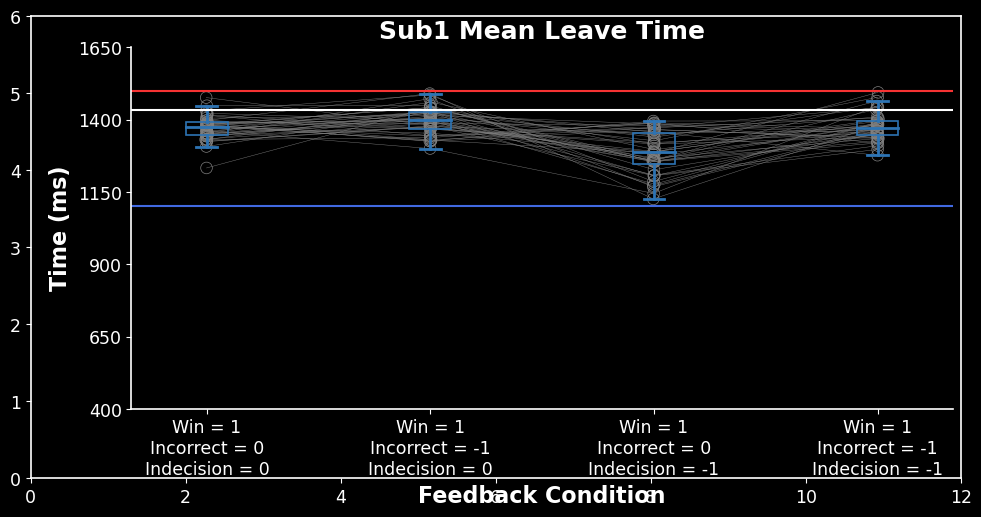

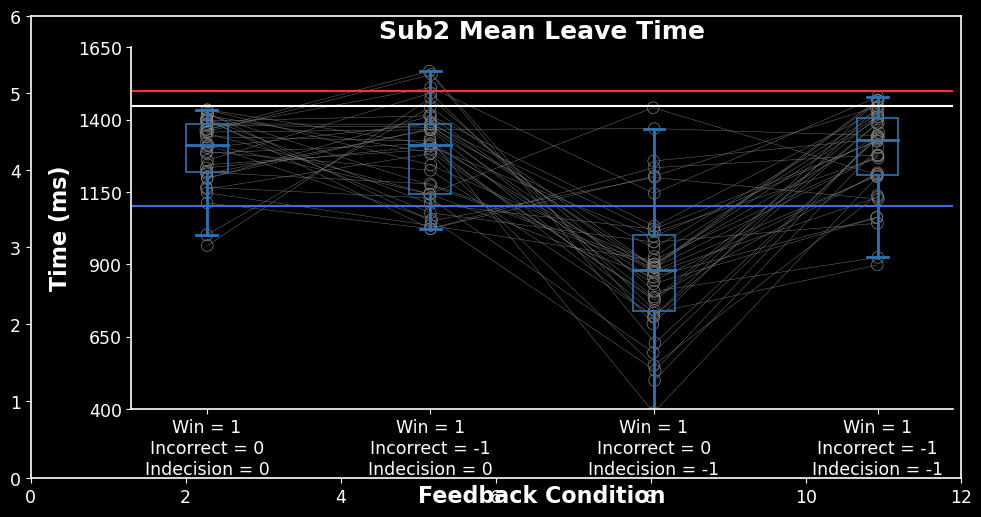

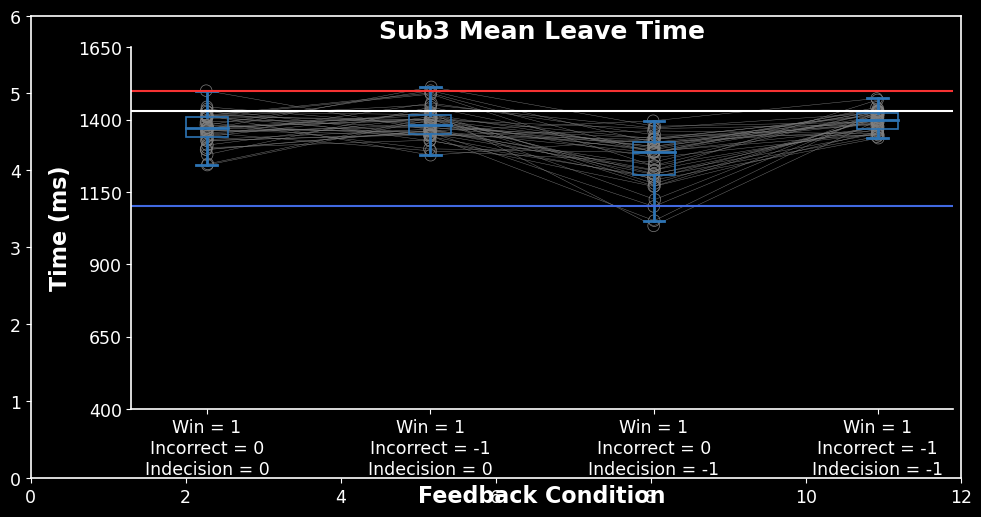

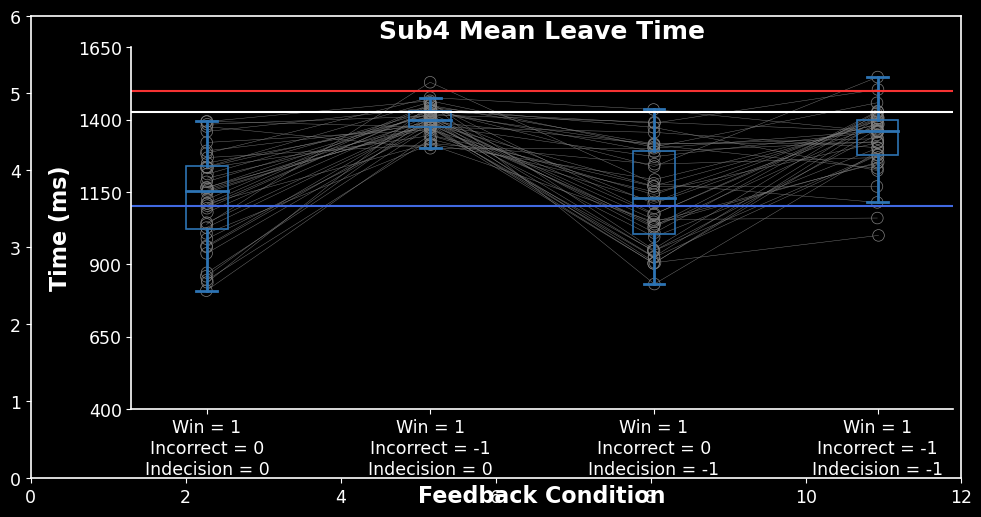

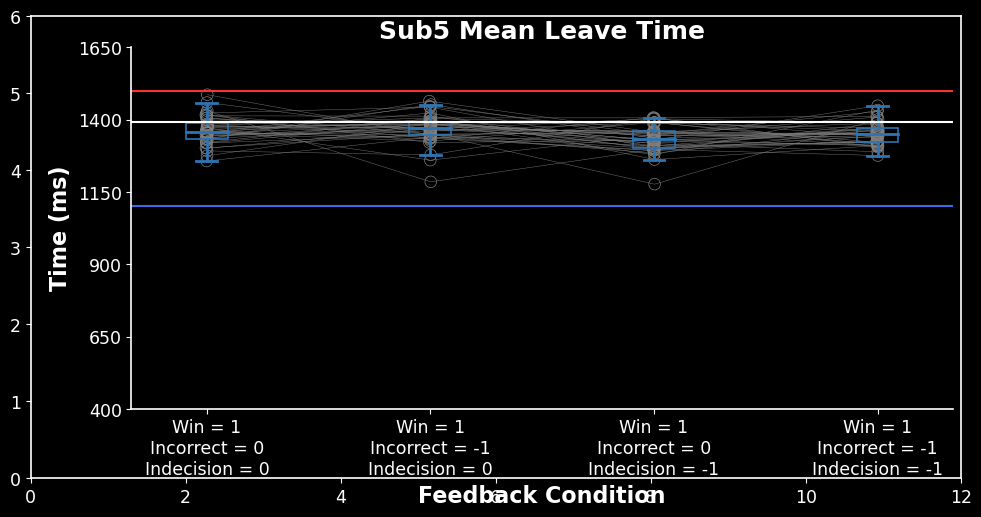

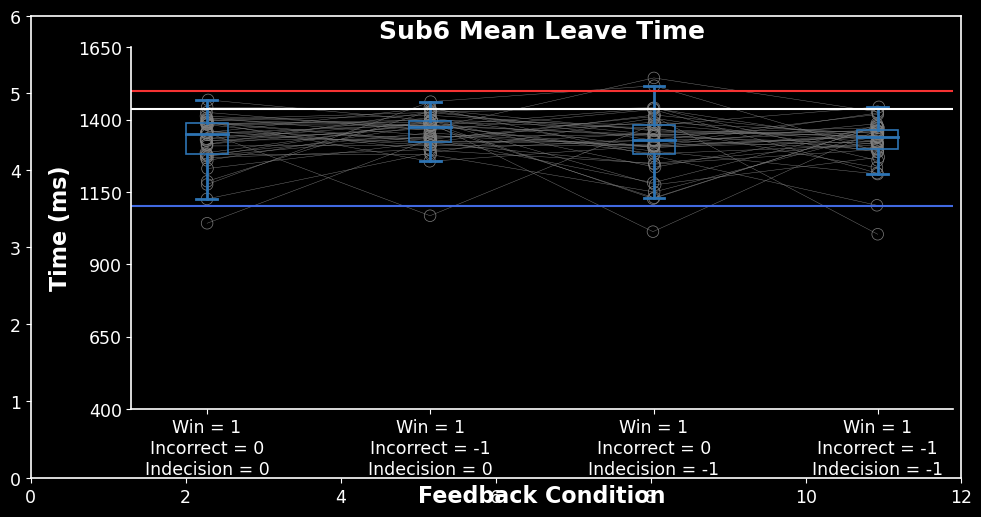

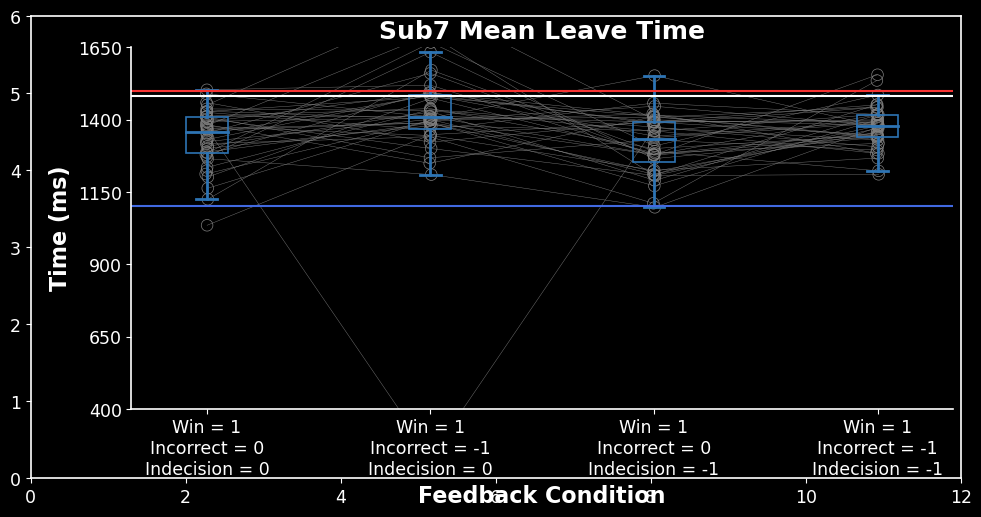

In [28]:
for i in range(num_subjects):
    metric = group.player_task_leave_time[i,:].T

    w,h = 12,6
    axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
    xlocs = np.linspace(0,w,num=len(trial_block_titles))
    ylocs = np.arange(400,1800,250)
    bw = 0.75
    pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
    dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
    ax.axhline(y=1500,c=wheel.red)
    ax.axhline(y=1100,c=wheel.blue)
    ax.axhline(y=1100+np.nanmedian(group.react_reaction_time_only_react[i]))
    ax.set_xticks(xlocs),ax.set_yticks(ylocs)
    ax.set_xticklabels(trial_block_titles)
    ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

    ax.set_xlabel('Feedback Condition')
    ax.set_ylabel('Time (ms)')
    ax.set_title(f'Sub{i+1} Mean Leave Time')
    if save:
        axmain.set_axis_off()
        plt.savefig(SAVE_PATH+'mean_leave_time', dpi = 400, transparent = True)
    else:
        axmain.set_axis_on()
    plt.show()

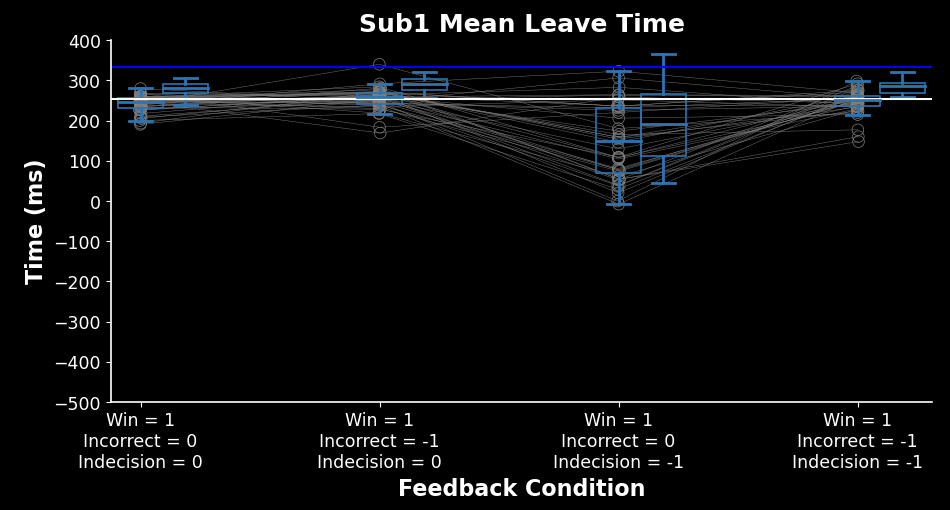

In [30]:
for i in range(1):
    metric = group.player_yforce_minus_agent_task_leave_time[i,:].T
    metric2 = group.player_minus_agent_task_leave_time[i,:].T
    w,h = 12,6
    axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
    xlocs = np.linspace(0,w,num=len(trial_block_titles))
    ylocs = np.arange(-500,500,100)
    bw = 0.75
    pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
    pf.multi_boxplot(ax,metric2,xlocs=xlocs+bw,box_width = bw,colors = wheel.seth_blue)
    dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
    ax.axhline(y=np.nanmedian(group.yforce_react_reaction_time_only_react[i]) - 2*np.nanstd(group.yforce_react_reaction_time_only_react[i]))
    ax.axhline(y=np.nanmedian(group.react_reaction_time_only_react[i]),c='blue')
    ax.set_xticks(xlocs),ax.set_yticks(ylocs)
    ax.set_xticklabels(trial_block_titles)
    # ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

    ax.set_xlabel('Feedback Condition')
    ax.set_ylabel('Time (ms)')
    ax.set_title(f'Sub{i+1} Mean Leave Time')
    if save:
        axmain.set_axis_off()
        plt.savefig(SAVE_PATH+'mean_leave_time', dpi = 400, transparent = True)
    axmain.set_axis_off()
    plt.show()

Reaction Movement Times

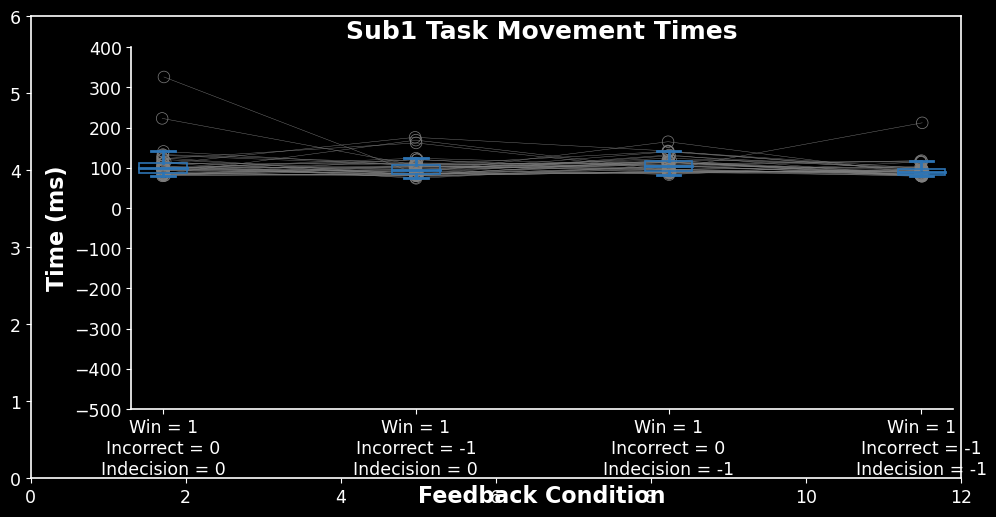

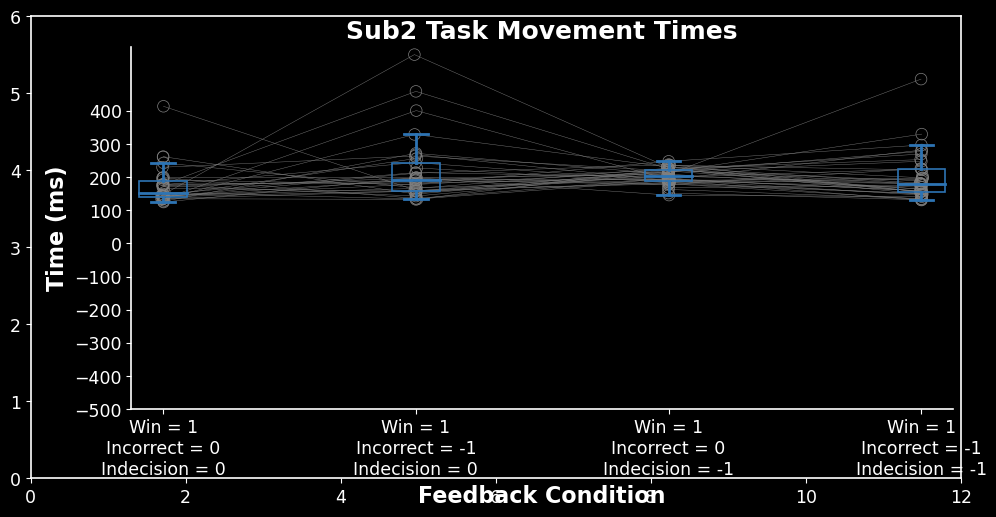

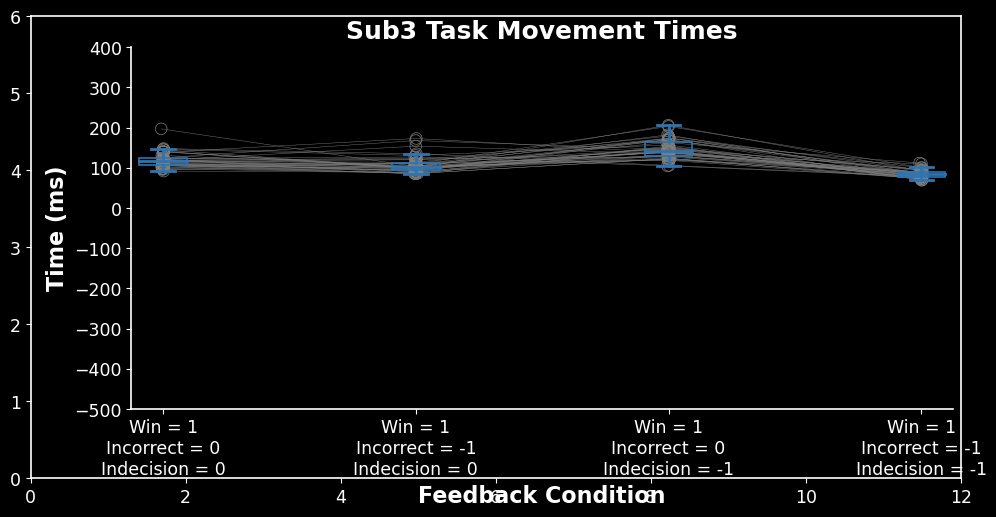

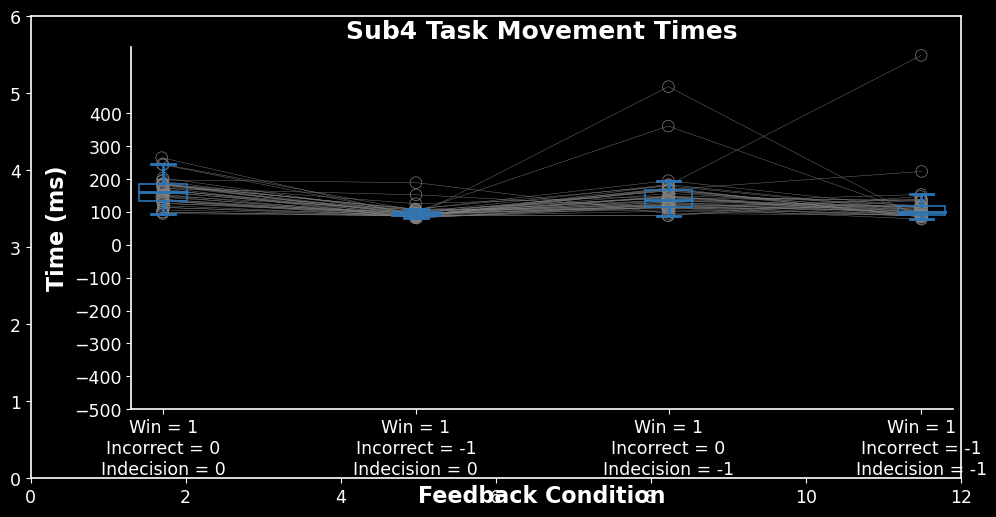

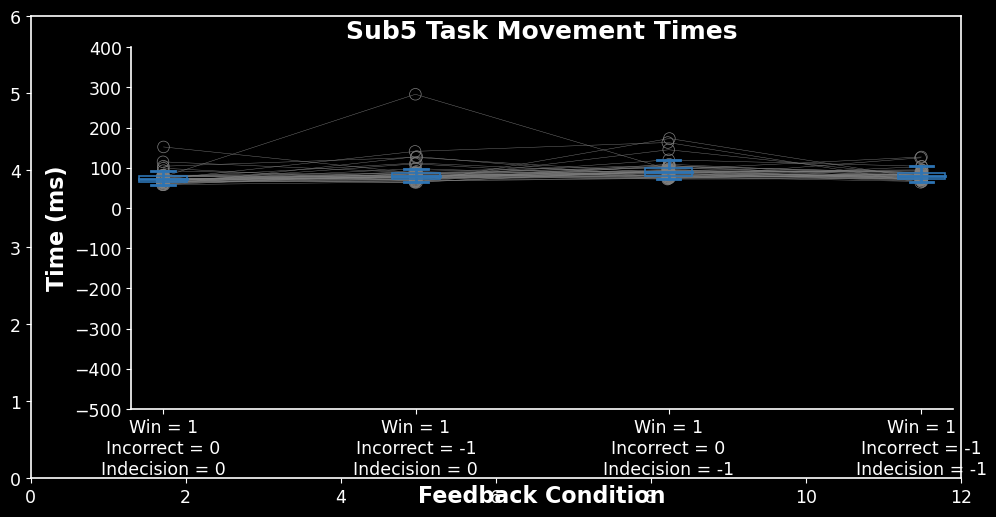

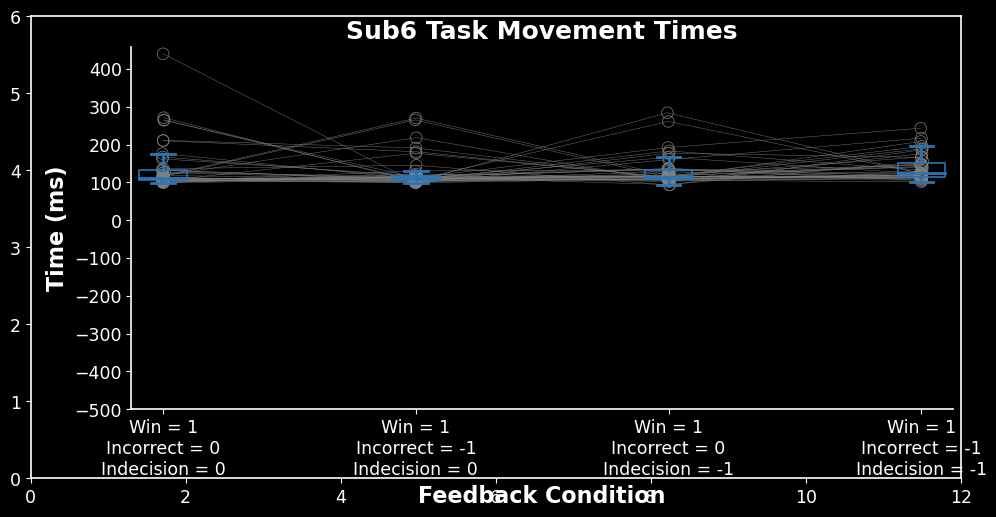

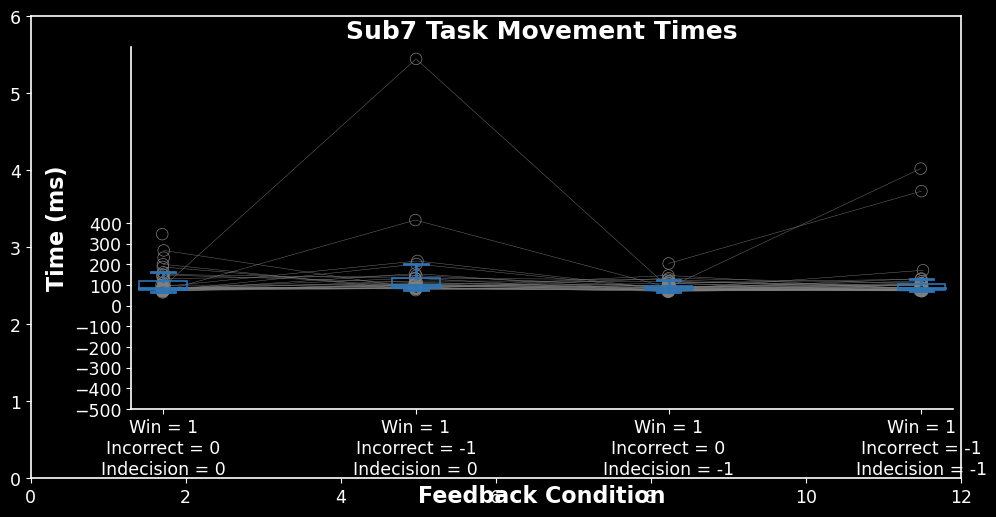

In [32]:
for i in range(num_subjects):
    metric = group.player_task_movement_time[i,:].T

    w,h = 12,6
    axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
    xlocs = np.linspace(0,w,num=len(trial_block_titles))
    ylocs = np.arange(-500,500,100)
    bw = 0.75
    pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
    dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
    ax.set_xticks(xlocs),ax.set_yticks(ylocs)
    ax.set_xticklabels(trial_block_titles)
    # ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

    ax.set_xlabel('Feedback Condition')
    ax.set_ylabel('Time (ms)')
    ax.set_title(f'Sub{i+1} Task Movement Times')
    if save:
        axmain.set_axis_off()
        plt.savefig(SAVE_PATH+'mean_leave_time', dpi = 400, transparent = True)
    else:
        axmain.set_axis_on()
    plt.show()

Task Movement Times

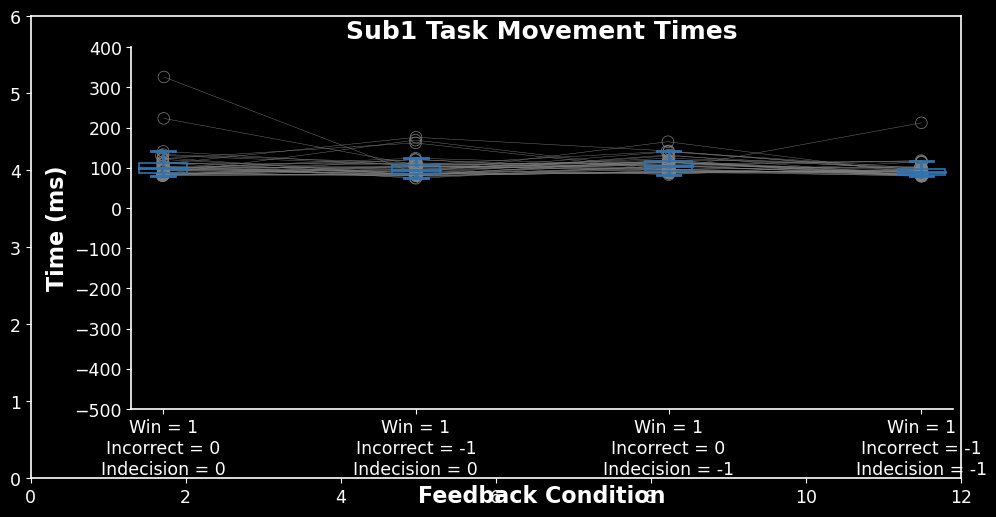

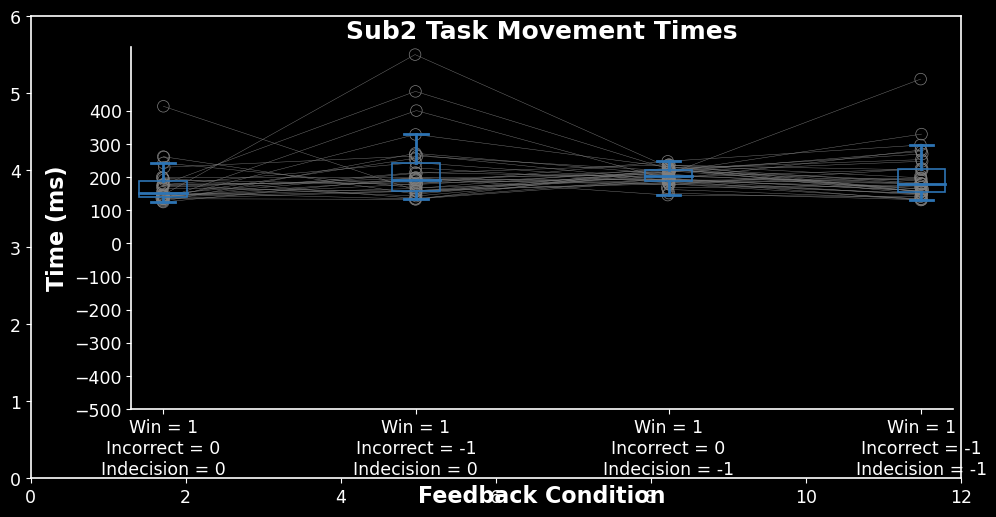

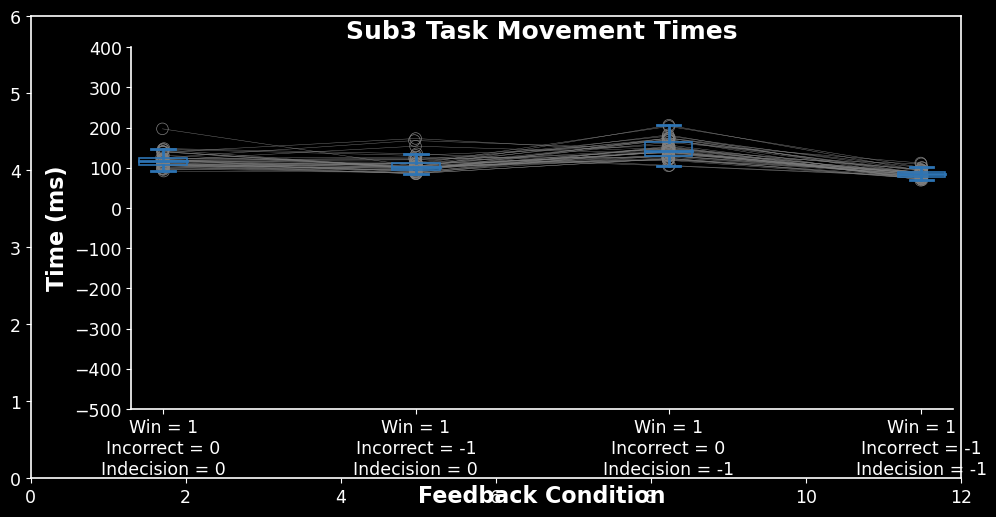

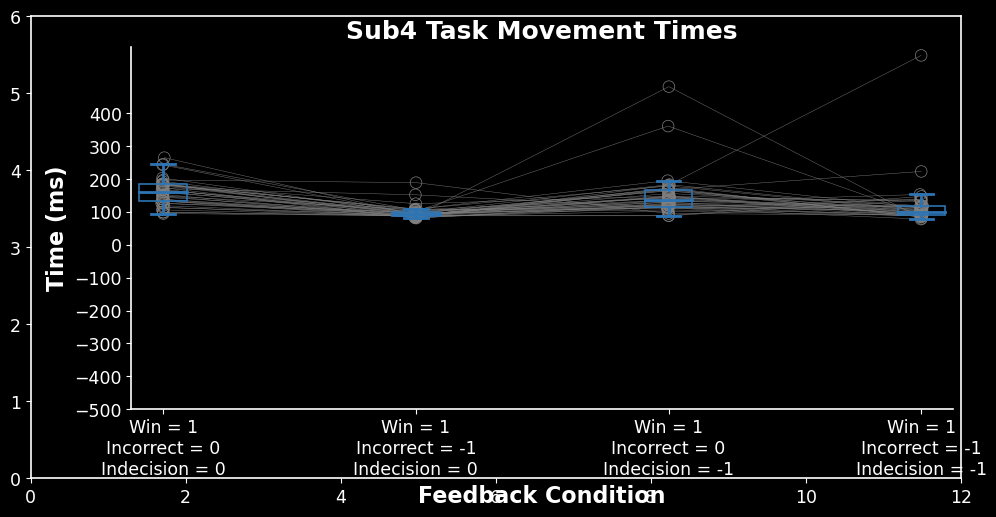

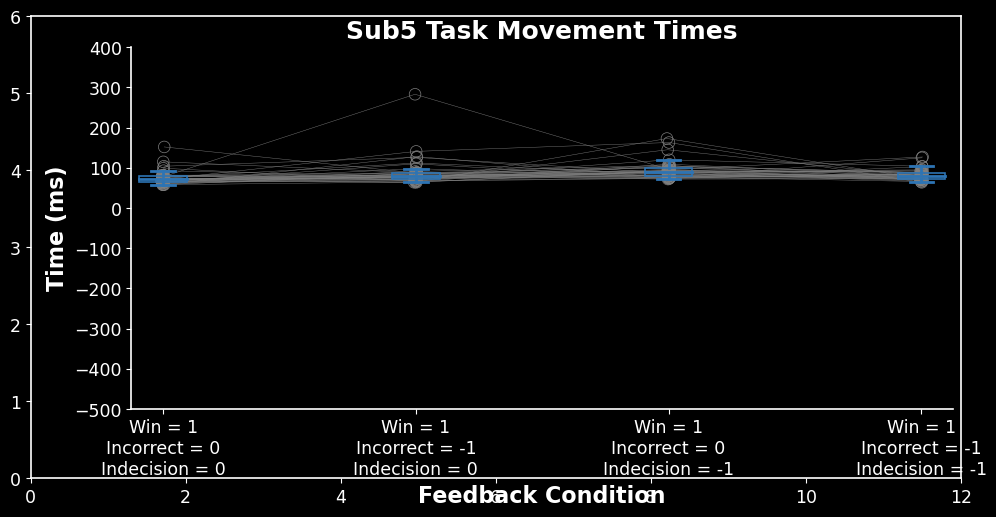

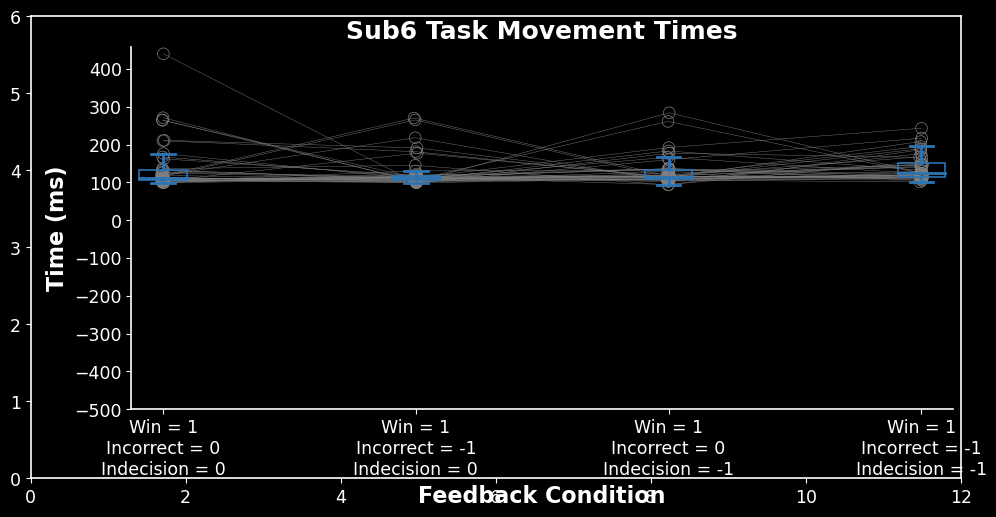

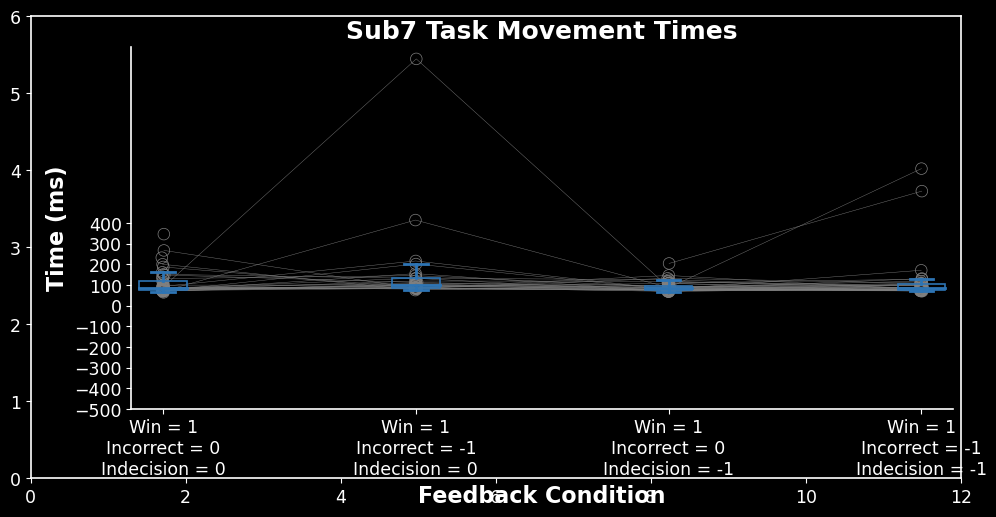

In [33]:
for i in range(num_subjects):
    metric = group.player_task_movement_time[i,:].T

    w,h = 12,6
    axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
    xlocs = np.linspace(0,w,num=len(trial_block_titles))
    ylocs = np.arange(-500,500,100)
    bw = 0.75
    pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
    dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
    ax.set_xticks(xlocs),ax.set_yticks(ylocs)
    ax.set_xticklabels(trial_block_titles)
    # ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

    ax.set_xlabel('Feedback Condition')
    ax.set_ylabel('Time (ms)')
    ax.set_title(f'Sub{i+1} Task Movement Times')
    if save:
        axmain.set_axis_off()
        plt.savefig(SAVE_PATH+'mean_leave_time', dpi = 400, transparent = True)
    else:
        axmain.set_axis_on()
    plt.show()

Agent Leave Time Connected With Player Leave Time

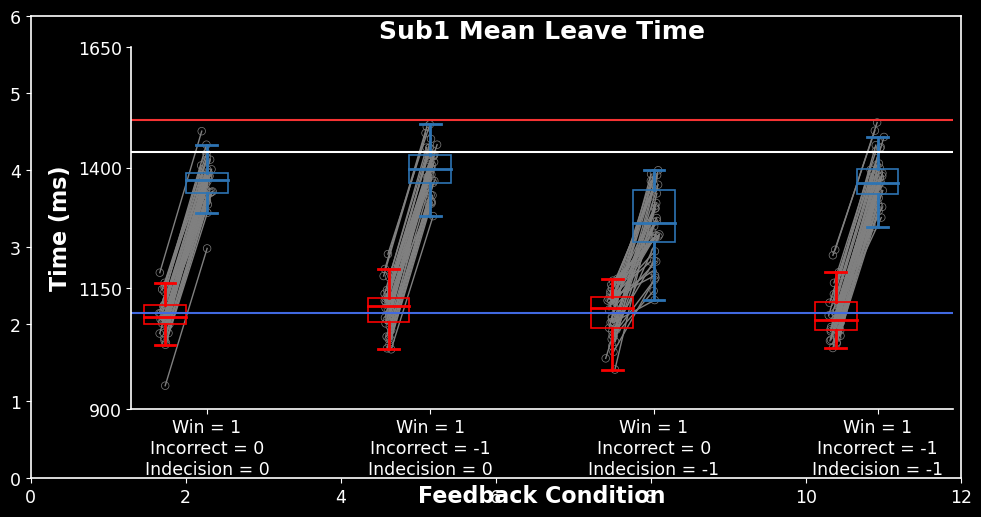

In [65]:
for i in range(1):
    metric1 = group.player_task_leave_time[i,:].T
    metric2 = group.agent_task_leave_time[i,:].T

    w,h = 12,6
    axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
    xlocs = np.linspace(0,w,num=len(trial_block_titles))
    ylocs = np.arange(900,1700,250)
    bw = 0.75
    pf.multi_boxplot(ax,metric1,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
    pf.multi_boxplot(ax,metric2,xlocs=xlocs-bw,box_width = bw,colors = wheel.seth_red)
    for j in range(num_blocks):     
            m = np.array([xlocs[j],xlocs[j]])
            x_pos = m + np.array([0,-bw])
            dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)    
    ax.axhline(y=1500,c=wheel.red)
    ax.axhline(y=1100,c=wheel.blue)
    ax.axhline(y=1100+np.nanmedian(group.react_reaction_time_only_react[i]))
    ax.set_xticks(xlocs),ax.set_yticks(ylocs)
    ax.set_xticklabels(trial_block_titles)
    ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

    ax.set_xlabel('Feedback Condition')
    ax.set_ylabel('Time (ms)')
    ax.set_title(f'Sub{i+1} Mean Leave Time')
    if save:
        axmain.set_axis_off()
        plt.savefig(SAVE_PATH+'mean_leave_time', dpi = 400, transparent = True)
    else:
        axmain.set_axis_on()
    plt.show()

In [59]:
np.nanmedian(group.player_minus_agent_task_leave_time,axis=2)

array([[ 280.36907959,  292.1427002 ,  190.75067139,  286.22894287],
       [ 225.3661499 ,  240.71057129, -234.58062744,  240.46972656],
       [ 286.65222168,  286.00653076,  184.40350342,  305.03704834],
       [  47.44287109,  296.62432861,   25.144104  ,  272.41732788],
       [ 264.74273682,  267.86917114,  244.65673828,  255.85186768],
       [ 261.54211426,  274.88519287,  265.51818848,  248.08422852],
       [ 274.77984619,  314.4432373 ,  257.50024414,  288.78356934]])

In [61]:
np.nanmedian(group.yforce_react_reaction_time_only_react,axis=1)

array([291.11297607, 275.56781006, 281.34332275, 283.10906982,
       262.66366577, 276.98019409, 342.51660156])

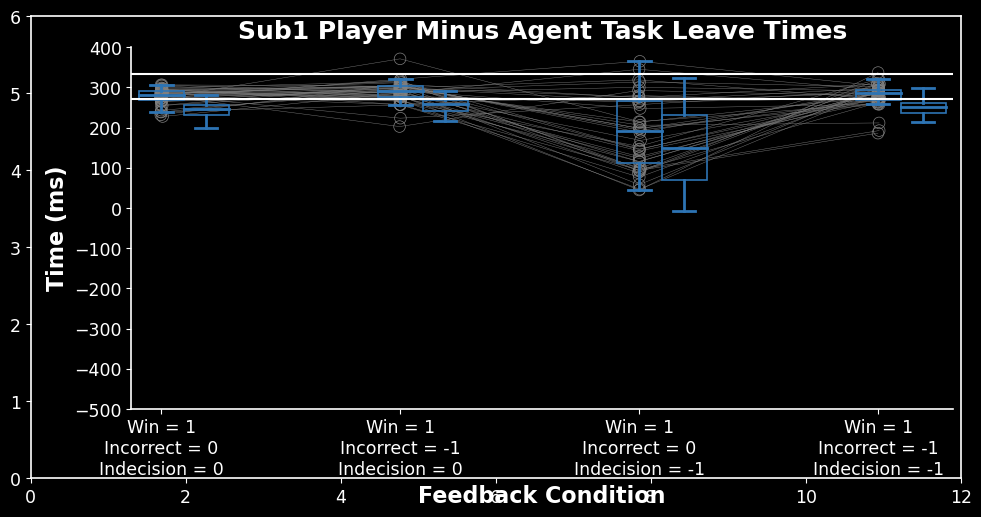

In [75]:
for i in range(1):
    metric = group.player_minus_agent_task_leave_time[i,:].T
    metric2 = group.player_yforce_minus_agent_task_leave_time[i,:].T

    w,h = 12,6
    axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
    xlocs = np.linspace(0,w,num=len(trial_block_titles))
    ylocs = np.arange(-500,500,100)
    bw = 0.75
    pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
    pf.multi_boxplot(ax,metric2,xlocs=xlocs+bw,box_width = bw,colors = wheel.seth_blue)
    dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
    ax.axhline(np.nanmedian(group.yforce_react_reaction_time_only_react,axis=1)[i] - 20)
    ax.axhline(np.nanmedian(group.react_reaction_time_only_react,axis=1)[i])
    ax.set_xticks(xlocs),ax.set_yticks(ylocs)
    ax.set_xticklabels(trial_block_titles)
    # ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

    ax.set_xlabel('Feedback Condition')
    ax.set_ylabel('Time (ms)')
    ax.set_title(f'Sub{i+1} Player Minus Agent Task Leave Times')
    if save:
        axmain.set_axis_off()
        plt.savefig(SAVE_PATH+'mean_leave_time', dpi = 400, transparent = True)
    axmain.set_axis_on()
    plt.show()

In [81]:
np.nanmedian(group.player_yforce_minus_agent_task_leave_time,axis=2)[:,0] - np.nanmedian(group.yforce_react_reaction_time_only_react,axis=1)

array([ -44.2142334 ,  -85.10540771,  -24.06787109, -295.0569458 ,
        -24.66305542,  -61.31954956,  -86.09185791])

In [82]:
np.nanmedian(group.player_minus_agent_task_leave_time,axis=2)[:,0] - np.nanmedian(group.react_reaction_time_only_react,axis=1)

array([ -53.32110596, -120.54721069,  -41.70428467, -277.3944397 ,
        -25.33151245,  -76.17230225, -106.75350952])